# Prior Predictive Analysis for SV Model

-  Step 1: Simulate hypothetical parameters iid via generated quantities block in Stan

- Step 2: Compute simulated data via the likelihood function (in Stan)

- Step 3: Compare simulated data with observed data to validate priors

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print("Current working directory: ", os.getcwd())

Current working directory:  c:\Users\nklatsky\econometrics\econometrics2024\project\code\stochastic_volatility


## Read in Real Data

In [3]:
# Define data path:
data_path = "../../data/DXY_approx_percent_returns.csv"
real_data = pd.read_csv(data_path, index_col=0)
real_data = real_data - np.mean(real_data)
real_data

,DXY
Date,
1994-04-01,-0.435009
1994-05-01,0.030122
1994-06-01,0.247245
1994-07-01,-0.768186
1994-10-01,0.362673
...,...
2024-03-21,-0.411072
2024-03-22,0.567956
2024-03-25,0.448986


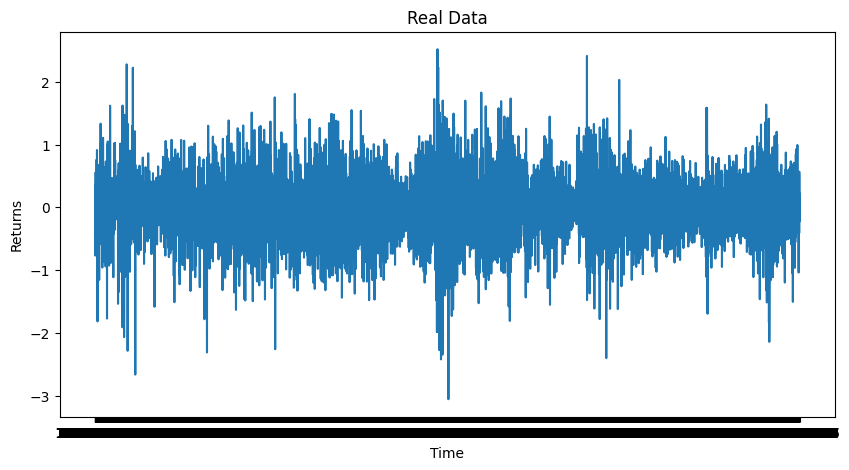

In [4]:
# Plot the real data:
plt.figure(figsize=(10, 5))
plt.plot(real_data)
plt.title("Real Data")
plt.xlabel("Time")
plt.ylabel("Returns")
plt.show()


## Read in Generated Data

In [5]:
# Read in generated data from prior predictive distribution(y_sim_samples)

sv_y_sim_path = "sampler_outputs/y_sim_samples.csv"
sv_y_sim = pd.read_csv(sv_y_sim_path)
sv_y_sim

,0,1,2,3,4,5,6,7,8,9,...,7792,7793,7794,7795,7796,7797,7798,7799,7800,7801
0,-0.164317,0.381074,0.287334,0.217069,0.510888,-0.480445,-0.063605,0.055265,-0.328706,0.474543,...,0.535874,-1.338260,0.595352,0.461409,0.139773,-0.235765,0.568104,-0.454493,0.147900,-0.989333
1,-0.096566,-0.320737,0.257399,-0.990914,-0.296739,0.246410,-0.031549,0.012285,-0.026507,0.056629,...,0.434513,0.720607,0.945733,-1.453380,0.206623,0.976540,0.237349,0.224158,0.079708,-0.314986
2,0.064504,0.396578,-0.205046,0.004794,-0.248995,-0.308573,-0.071259,-1.451760,-0.173438,-0.205394,...,0.433587,0.092957,0.408950,0.995656,0.219427,-0.380468,-0.696585,0.403954,-0.229296,0.171811
3,-0.163667,0.463053,0.111149,-0.198514,-0.171144,0.382747,-0.156188,-0.012249,-0.172200,-0.477387,...,-0.030797,-0.375475,0.180835,0.136679,-0.473694,-0.044648,-0.890731,0.653812,-0.549158,0.101903
4,0.534223,1.151080,-0.049081,-0.650943,-2.156240,-0.156331,0.238596,-4.124190,-0.069728,-1.385130,...,0.842191,1.580300,-0.167063,1.177260,-2.650590,-0.751775,1.335840,-2.016030,-2.410530,-1.678050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.130581,0.235479,0.106183,-0.170726,0.079120,-1.105000,0.520750,-0.026721,0.278180,-0.149405,...,0.630568,-0.089472,-0.031134,0.124762,0.177394,0.038102,-0.150849,-0.172222,-0.137338,-0.585430
3996,-0.084829,-0.159155,-0.400333,-0.359886,0.199085,-0.064127,0.751736,-0.280033,-0.227113,0.189379,...,-0.593441,0.028163,-1.124040,-0.128073,-1.746240,-0.451273,-0.170382,0.214868,-0.280083,0.051089
3997,1.003150,-0.621167,-0.162367,0.010433,2.110450,-0.007569,-0.013962,0.594574,-0.114520,-0.611380,...,0.576223,0.081587,-0.622414,-0.333174,-1.936760,-0.595802,0.295006,-0.139683,-0.544839,-0.318268
3998,0.879867,-0.945521,-0.043096,0.312223,-3.767820,-0.293766,-0.802756,0.049220,-0.177464,-0.859867,...,-0.703940,-0.418480,2.620020,-1.010130,-1.005250,-0.453530,0.513533,-0.291815,0.397502,0.288533


In [6]:
# Flatten sv_y_sim and print the min, max, and quantiles
sv_y_sim_flat = sv_y_sim.values.flatten()
print("Min: ", np.min(sv_y_sim_flat))
print("Max: ", np.max(sv_y_sim_flat))
print("Mean: ", np.mean(sv_y_sim_flat))
print("Quantiles: ", np.quantile(sv_y_sim_flat, [0.025, 0.975]))


# Print the number of values with abs > 100
print("Number of values with abs > 1000: ", np.sum(np.abs(sv_y_sim_flat) > 1000))
# > 100
print("Number of values with abs > 100: ", np.sum(np.abs(sv_y_sim_flat) > 100))


Min:  -95243.5
Max:  274151.0
Mean:  0.006302892990517154
Quantiles:  [-2.46589  2.46574]
Number of values with abs > 1000:  735
Number of values with abs > 100:  6629


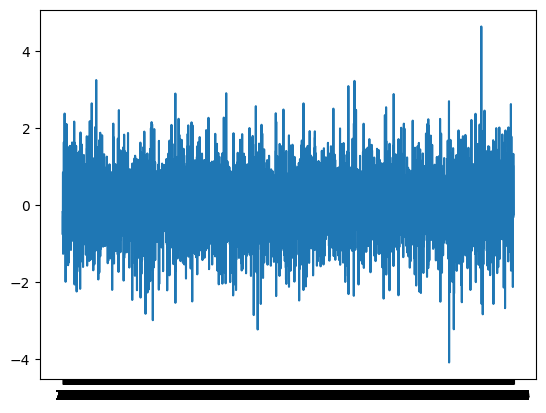

In [7]:
# Plot one sample series
idx = 1005
plt.plot(sv_y_sim.iloc[idx])
plt.show()

In [8]:
# Read in the generated parameters to validate:

h_sim_path = "sampler_outputs/h_sim_samples.csv"
h_std_sim_path = "sampler_outputs/h_std_sim_samples.csv"
mu_sim_path = "sampler_outputs/mu_sim_samples.csv"
phi_sim_path = "sampler_outputs/phi_sim_samples.csv"
sigma_sim_path = "sampler_outputs/sigma_sim_samples.csv"
scale_sim_path = "sampler_outputs/scale_sim_samples.csv"


h_sim = pd.read_csv(h_sim_path)
h_std_sim = pd.read_csv(h_std_sim_path)
mu_sim = pd.read_csv(mu_sim_path)
phi_sim = pd.read_csv(phi_sim_path)
sigma_sim = pd.read_csv(sigma_sim_path)
scale_sim = pd.read_csv(scale_sim_path)





In [9]:
# Find mean, std, min, max, and median for h_sim, h_std_sim, mu_sim, phi_sim, sigma_sim
def print_summary_stats(data, name):
    print(name)
    print("Mean: ", np.mean(data))
    print("Std: ", np.std(data))
    print("Min: ", np.min(data))
    print("Max: ", np.max(data))
    print("Median: ", np.median(data))
    print("\n")

vars_list = [h_sim, h_std_sim, mu_sim, phi_sim, sigma_sim, scale_sim]
names_list = ["h_sim", "h_std_sim", "mu_sim", "phi_sim", "sigma_sim", "scale_sim"]

for i in range(len(vars_list)):
    print_summary_stats(vars_list[i].values.flatten(), names_list[i])

h_sim
Mean:  -0.46547822813400175
Std:  1.4080558963399836
Min:  -25.5484
Max:  25.8556
Median:  -0.451603


h_std_sim
Mean:  -2.4328075690020547e-05
Std:  1.0000064681248881
Min:  -5.47444
Max:  5.44622
Median:  -0.00016204050000000002


mu_sim
Mean:  -0.46500077263178
Std:  1.0044175946523417
Min:  -3.88923
Max:  2.74063
Median:  -0.4563115


phi_sim
Mean:  0.7472071849999999
Std:  0.09812430248347387
Min:  0.274721
Max:  0.998099
Median:  0.749556


sigma_sim
Mean:  0.427299608425
Std:  0.3991819794262853
Min:  0.0435192
Max:  2.98968
Median:  0.29376349999999996


scale_sim
Mean:  1.303871887752103
Std:  114.00528619592016
Min:  2.83307e-06
Max:  411589.0
Median:  0.797876




# Comparison

Real mean:  DXY    3.642875e-18
dtype: float64
Simulated mean:  -0.010738502406075365


Real std:  DXY    0.483034
dtype: float64
Simulated std:  0.7026843264571899


Real min:  DXY   -3.057377
dtype: float64
Simulated min:  -4.26924


Real max:  DXY    2.51896
dtype: float64
Simulated max:  5.20503


Real Median:  DXY   -0.000945
dtype: float64
Simulated Median:  -0.02244915




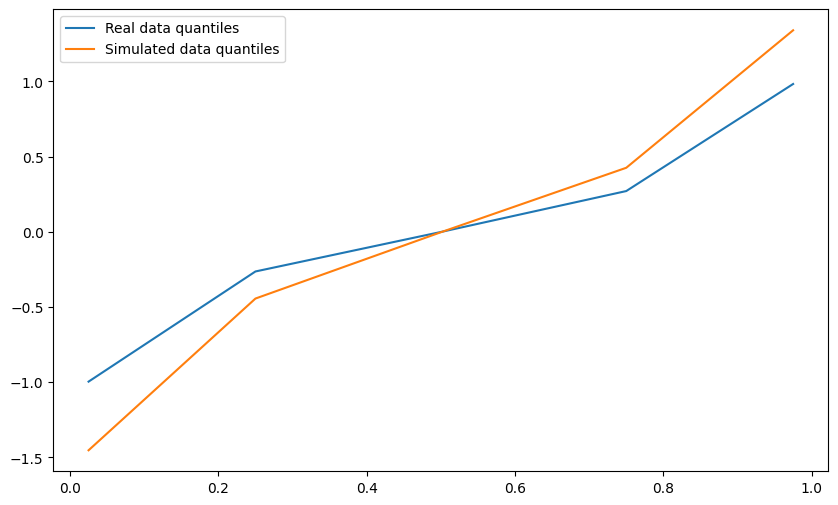

Real mean:  DXY    3.642875e-18
dtype: float64
Simulated mean:  -0.007368245070412712


Real std:  DXY    0.483034
dtype: float64
Simulated std:  0.6890677342401114


Real min:  DXY   -3.057377
dtype: float64
Simulated min:  -3.38403


Real max:  DXY    2.51896
dtype: float64
Simulated max:  3.20279


Real Median:  DXY   -0.000945
dtype: float64
Simulated Median:  -0.02244915




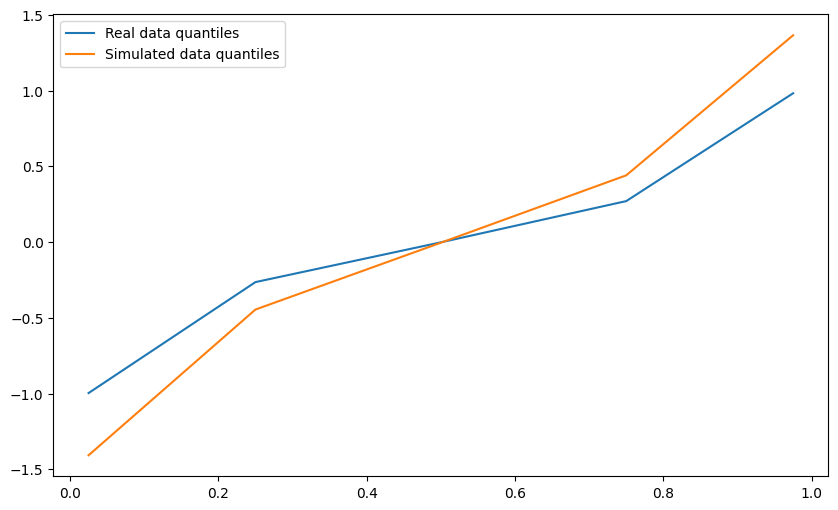

Real mean:  DXY    3.642875e-18
dtype: float64
Simulated mean:  -0.008189035300274289


Real std:  DXY    0.483034
dtype: float64
Simulated std:  0.7024256169824152


Real min:  DXY   -3.057377
dtype: float64
Simulated min:  -2.66423


Real max:  DXY    2.51896
dtype: float64
Simulated max:  4.21119


Real Median:  DXY   -0.000945
dtype: float64
Simulated Median:  -0.02244915




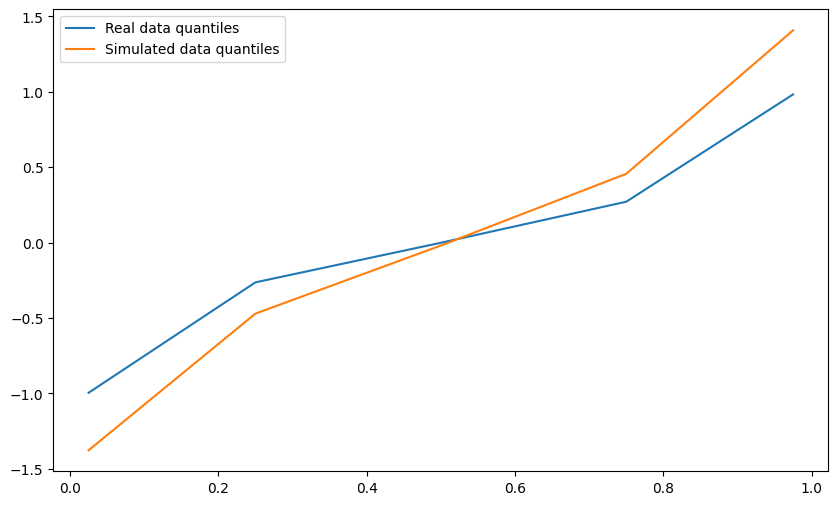

Real mean:  DXY    3.642875e-18
dtype: float64
Simulated mean:  -0.006415876505613944


Real std:  DXY    0.483034
dtype: float64
Simulated std:  0.5037511524656534


Real min:  DXY   -3.057377
dtype: float64
Simulated min:  -2.15711


Real max:  DXY    2.51896
dtype: float64
Simulated max:  2.12003


Real Median:  DXY   -0.000945
dtype: float64
Simulated Median:  -0.02244915




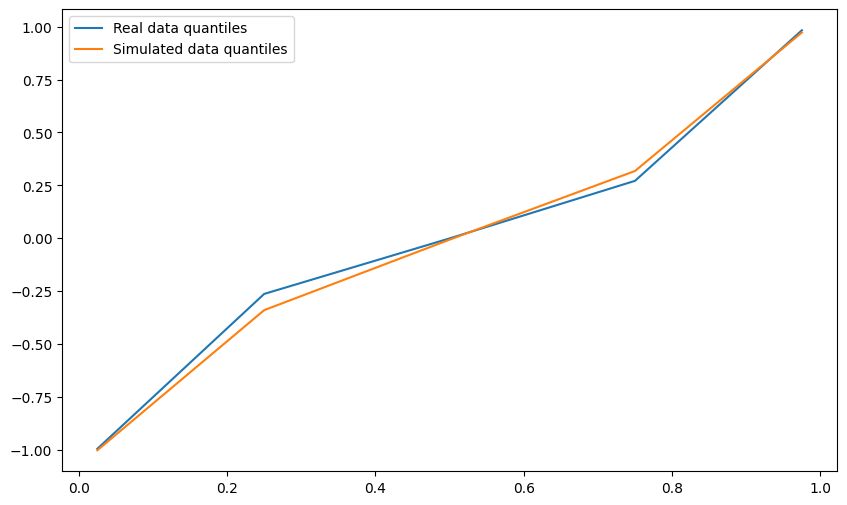

Real mean:  DXY    3.642875e-18
dtype: float64
Simulated mean:  -0.00477881755637016


Real std:  DXY    0.483034
dtype: float64
Simulated std:  0.41187498233156894


Real min:  DXY   -3.057377
dtype: float64
Simulated min:  -1.54332


Real max:  DXY    2.51896
dtype: float64
Simulated max:  1.91445


Real Median:  DXY   -0.000945
dtype: float64
Simulated Median:  -0.02244915




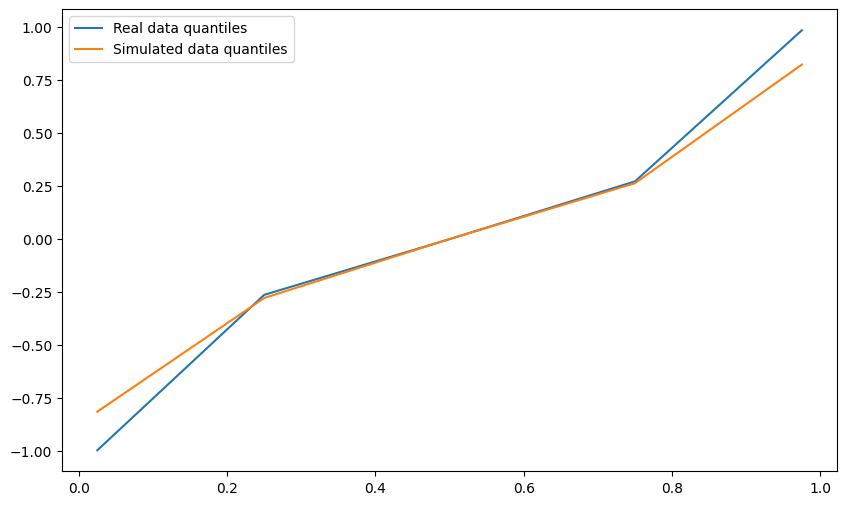

Real mean:  DXY    3.642875e-18
dtype: float64
Simulated mean:  0.0003006239394770549


Real std:  DXY    0.483034
dtype: float64
Simulated std:  0.6118434947781669


Real min:  DXY   -3.057377
dtype: float64
Simulated min:  -2.62839


Real max:  DXY    2.51896
dtype: float64
Simulated max:  2.56734


Real Median:  DXY   -0.000945
dtype: float64
Simulated Median:  -0.02244915




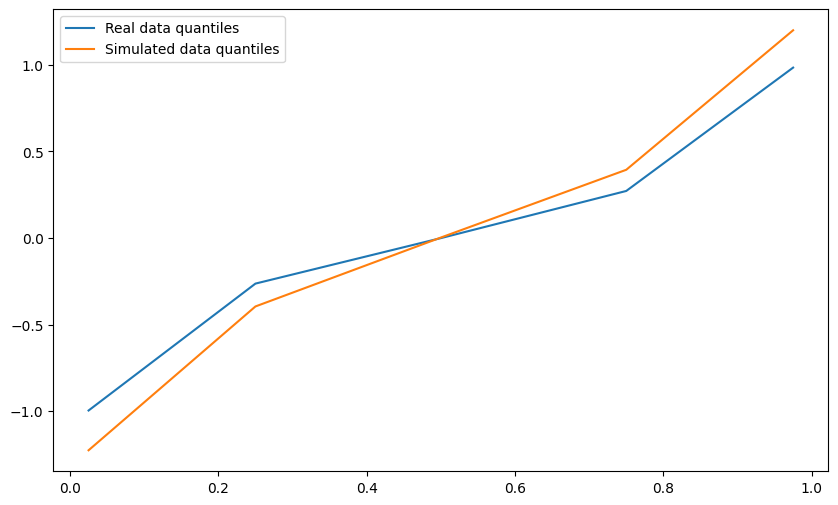

Real mean:  DXY    3.642875e-18
dtype: float64
Simulated mean:  -0.007758432684337348


Real std:  DXY    0.483034
dtype: float64
Simulated std:  2.3564064097056425


Real min:  DXY   -3.057377
dtype: float64
Simulated min:  -10.1187


Real max:  DXY    2.51896
dtype: float64
Simulated max:  10.5315


Real Median:  DXY   -0.000945
dtype: float64
Simulated Median:  -0.02244915




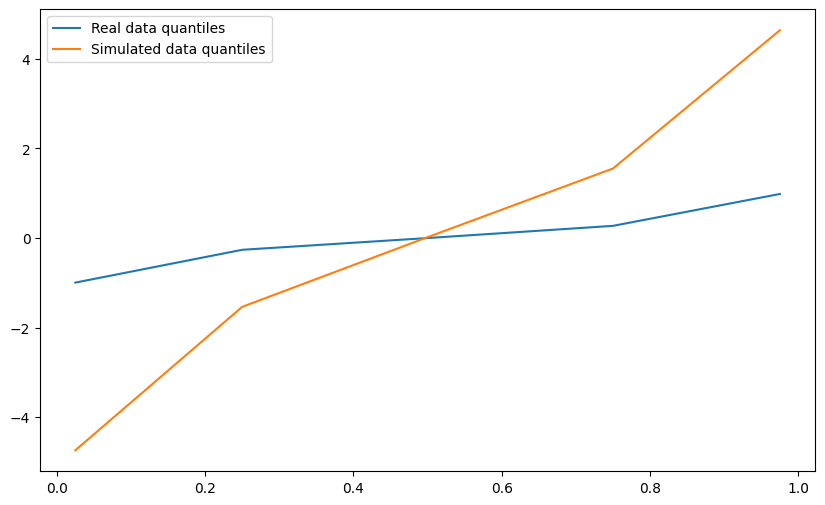

Real mean:  DXY    3.642875e-18
dtype: float64
Simulated mean:  -0.05517352882542939


Real std:  DXY    0.483034
dtype: float64
Simulated std:  8.564696207167032


Real min:  DXY   -3.057377
dtype: float64
Simulated min:  -230.991


Real max:  DXY    2.51896
dtype: float64
Simulated max:  117.729


Real Median:  DXY   -0.000945
dtype: float64
Simulated Median:  -0.02244915




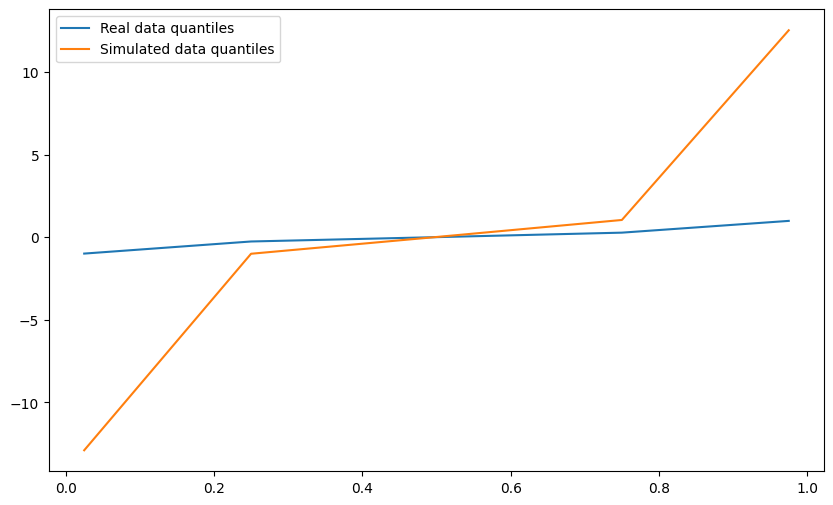

Real mean:  DXY    3.642875e-18
dtype: float64
Simulated mean:  0.019191784414252754


Real std:  DXY    0.483034
dtype: float64
Simulated std:  1.5976876553153478


Real min:  DXY   -3.057377
dtype: float64
Simulated min:  -34.2964


Real max:  DXY    2.51896
dtype: float64
Simulated max:  17.6596


Real Median:  DXY   -0.000945
dtype: float64
Simulated Median:  -0.02244915




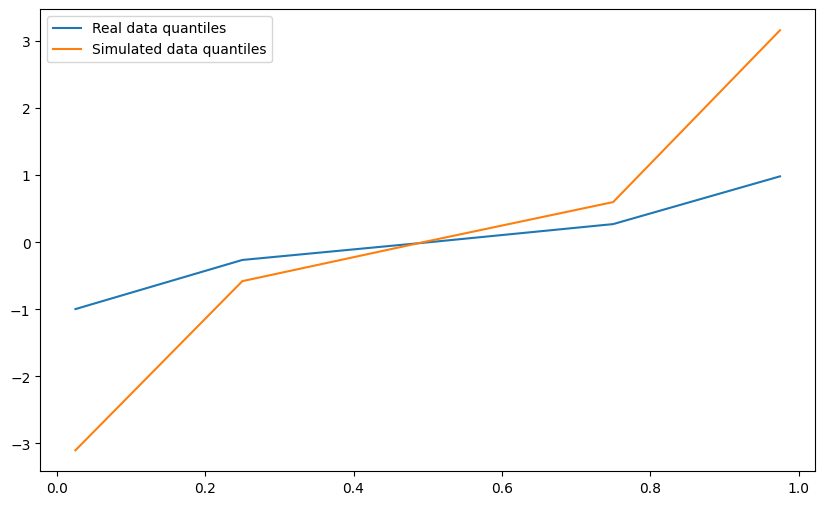

Real mean:  DXY    3.642875e-18
dtype: float64
Simulated mean:  -0.005929668318777235


Real std:  DXY    0.483034
dtype: float64
Simulated std:  0.5325444905184202


Real min:  DXY   -3.057377
dtype: float64
Simulated min:  -2.23329


Real max:  DXY    2.51896
dtype: float64
Simulated max:  2.32606


Real Median:  DXY   -0.000945
dtype: float64
Simulated Median:  -0.02244915




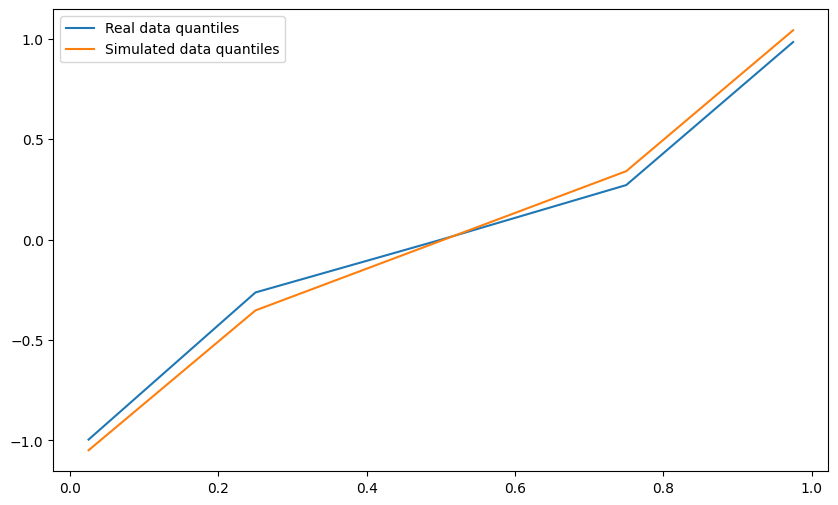

In [10]:
# Loop through rows in sv_y_sim (which each represent a simulated time series) and calculate the mean, stddev, and quantiles. Then compare to the real data.

real_mean = real_data.mean()
real_std = real_data.std()
real_quantiles = real_data.quantile([0.025, 0.25, 0.5, 0.75, 0.975])
real_min = real_data.min()
real_max = real_data.max()

simulated_means = []
simulated_stds = []
simulated_quantiles = []
simulated_mins = []
simulated_maxs = []
simulated_medians = []

for row in range(sv_y_sim.shape[0]):
    sim_data = sv_y_sim.iloc[row]

    sim_mean = sim_data.mean()
    sim_std = sim_data.std()
    sim_quantiles = sim_data.quantile([0.025, 0.25, 0.5, 0.75, 0.975])
    sim_min = sim_data.min()
    sim_max = sim_data.max()
    sim_median = sim_data.median()

    simulated_means.append(sim_mean)
    simulated_stds.append(sim_std)
    simulated_quantiles.append(sim_quantiles)
    simulated_mins.append(sim_min)
    simulated_maxs.append(sim_max)
    simulated_medians.append(sim_median)

# Plot for comparison at select indices:
indices = [row for row in range(0, len(simulated_means), len(simulated_means)//10)]

for idx in indices:
    sim_mean = simulated_means[idx]
    sim_std = simulated_stds[idx]
    sim_quantiles = simulated_quantiles[idx]
    sim_min = simulated_mins[idx]
    sim_max = simulated_maxs[idx]


    print("Real mean: ", real_mean)
    print("Simulated mean: ", sim_mean)
    print("\n")

    print("Real std: ", real_std)
    print("Simulated std: ", sim_std)
    print("\n")

    print("Real min: ", real_min)
    print("Simulated min: ", sim_min)
    print("\n")

    print("Real max: ", real_max)
    print("Simulated max: ", sim_max)
    print("\n")

    print("Real Median: ", real_data.median())
    print("Simulated Median: ", sim_median)
    print("\n")

    # Plot quantiles
    plt.figure(figsize=(10, 6))
    plt.plot(real_quantiles, label="Real data quantiles")
    plt.plot(sim_quantiles, label="Simulated data quantiles")
    plt.legend()

    plt.show()




len of simulated_means:  4000
len of simulated_stds:  4000
len of simulated_quantiles:  4000
len of simulated_mins:  4000
len of simulated_maxs:  4000
len of real_mean:  1
len of real_std:  1
len of real_quantiles:  5
len of real_min:  1
len of real_max:  1


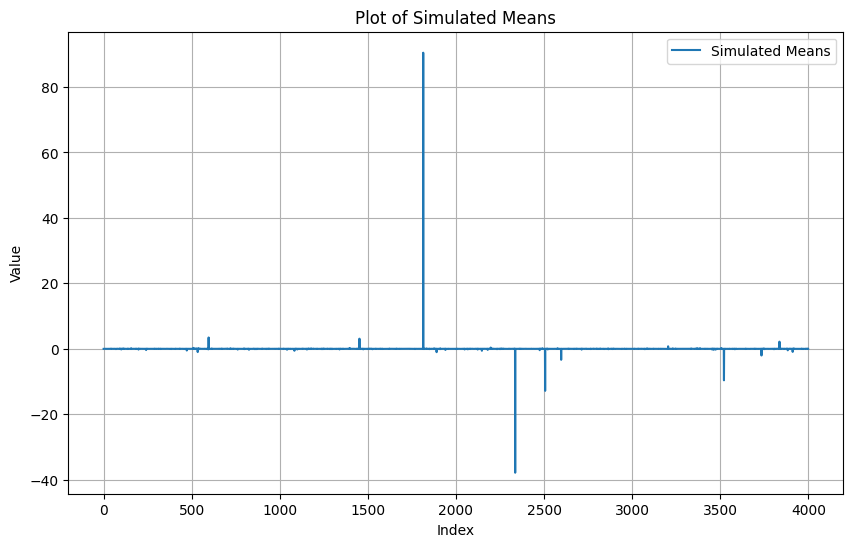

In [11]:
print('len of simulated_means: ', len(simulated_means))
print('len of simulated_stds: ', len(simulated_stds))
print('len of simulated_quantiles: ', len(simulated_quantiles))
print('len of simulated_mins: ', len(simulated_mins))
print('len of simulated_maxs: ', len(simulated_maxs))
print('len of real_mean: ', len(real_mean))
print('len of real_std: ', len(real_std))
print('len of real_quantiles: ', len(real_quantiles))
print('len of real_min: ', len(real_min))
print('len of real_max: ', len(real_max))

simulated_means = np.array(simulated_means)

plt.figure(figsize=(10, 6))
plt.plot(simulated_means, label='Simulated Means')
plt.title('Plot of Simulated Means')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

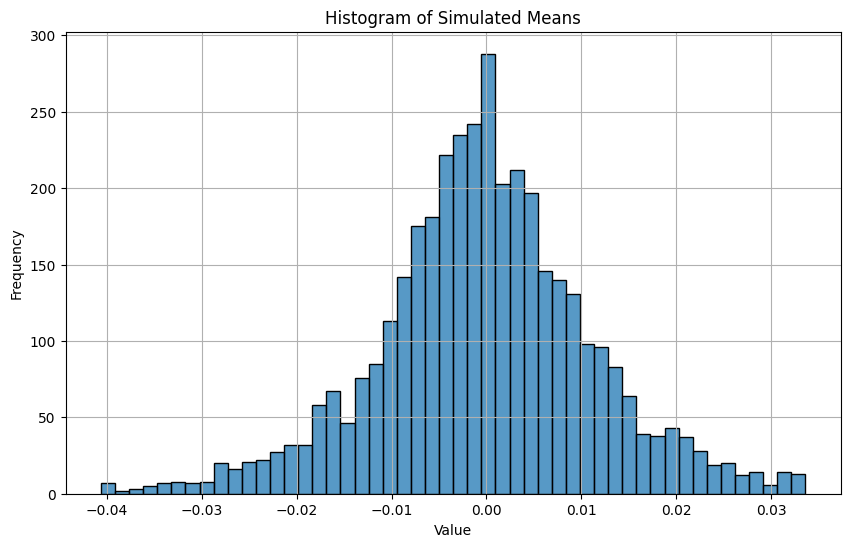

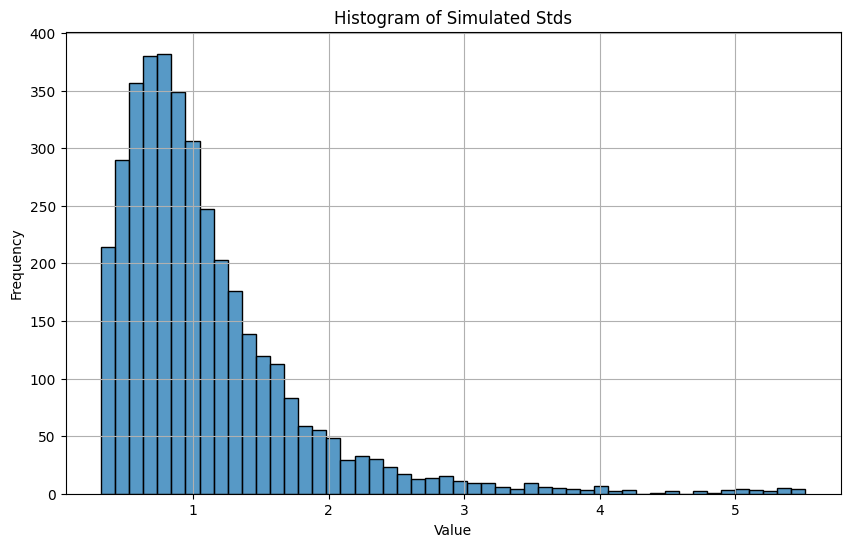

In [17]:
simulated_means = np.array(simulated_means)
simulated_stds = np.array(simulated_stds)
simulated_mins = np.array(simulated_mins)
simulated_maxs = np.array(simulated_maxs)


# Create version of simulated_means and simulated_stds that only includes values between the 2.5th and 97.5th percentiles
truncated_sim_means = simulated_means[(simulated_means > np.quantile(simulated_means, 0.025)) & (simulated_means < np.quantile(simulated_means, 0.975))]
truncated_sim_stds = simulated_stds[(simulated_stds > np.quantile(simulated_stds, 0.025)) & (simulated_stds < np.quantile(simulated_stds, 0.975))]

# Plot the histogram of truncated_sim_means and truncated_sim_stds
plt.figure(figsize=(10, 6))
sns.histplot(truncated_sim_means, bins=50)
plt.title('Histogram of Simulated Means')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(truncated_sim_stds, bins=50)
plt.title('Histogram of Simulated Stds')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()




In [13]:
simulated_means

array([-0.0107385 ,  0.00028222, -0.00783499, ..., -0.00060596,
       -0.02450232, -0.01246914])